# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Tansah Jumeneng Prayogi
- **Email:** jumenengtansah@gmail.com  
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis


- Pada musin apa penyewaan sepeda paling banyak dan sedikit ?
- Pada cuaca ada penyewaan sepeda paling banyak dan sedikit ?
- Pada jam berapa peminjaman sepeda mencapai peak dan paling sedikit ?
- Pada weekend atau weekday peminjaman sepeda lebih banyak ?
- Seberapa banyak seseorang yang melakukan peminjaman kategroi registered dengan casual ?
- Bagaimana pengaruh humidity dengan jumlah rental sepeda ?
- Bagaimana tren peminjaman dalam beebrapa tahun terkahir ?

## Import Semua Packages/Library yang Digunakan

In [37]:
#load library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### GATHERING DATA

In [38]:
#memuat data day.csv -> peminjaman harian
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
#memuat data hour.csv -> peminjaman harian detail perjam 
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### ASSESING DATA

In [40]:
#memeriksa tipe data dari tiap kolom day.csv dan hour.csv
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

insight: 
- kolom 'dtday' seharusnya bertipe datetime bukan object
- kolom season, yr, weathersit harus diubha ke kategorial

In [41]:
#menilai banyaknya missing value dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

insight : tidak ada missing value 

In [42]:
#menilai banyaknkya missing value dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

insight : tidak ada missing value

In [43]:
#mengeecek banyaknya duplikasi data 
day_df.duplicated().sum()
hour_df.duplicated().sum()

0

insight : tidak ada duplikasi data di kedua dataset

In [44]:
#menilai parameter statistika dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
#menilai parameter statistika datast hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- menghapus kolom instant sebagai recird index karean pada pandas sudah ada index recordnya
- menghapus kolom working day karena sduah direpresentasikan oleh kolom weekday yang berisi day of week
- mengganti tipe data kolom dteday yang mulanya 'object' menajdi 'datetime'
- mengganti nama kolom agar mudah dibaca
- menambah kolom baru pengganti working_day pakah hari itu weekend atau weekdays
- menngubah tipe data kolom 'season', ''mnth', 'holiday', 'weekday', 'wheatersit' karena memiliki kategori sehingga diganti ke tipe data categorial

#### Droppping kolom 'instant'

In [46]:
hour_df.drop(['workingday'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

#### Alter column 'dteday' 'object' ke 'datetime'

In [47]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Alter column type int to category

In [48]:
# merubah tipe data int kolom 'season', 'mnth', 'holoday', 'weekday', 'weathershit' menadi categori
columns_alter = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns_alter:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

#### Rename nama column

In [49]:
#rename nama kolom agar mudah dipahami pada dataset day_df
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit' : 'weather_situation',
    'windspeed' : 'wind_speed',
    'cnt' : 'count_rent',
    'hum' : 'humidity'
}, inplace=True)

In [50]:
#rename nama kolom agar mudah dipahami pada dataset hour_df
hour_df.rename(columns={
    'yr': 'year',
    'hr' : 'hours',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit' : 'weather_situation',
    'windspeed' : 'wind_speed',
    'cnt' : 'count_rent',
    'hum' : 'humidity'
}, inplace=True)

#### Konversi nilai pada kolom categorial berdasarkan kriteria 


In [51]:
import pandas as pd

# Fungsi aman untuk mengganti kategori atau nilai
def rename_categories_safe(df, col, mapping_dict):
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        df[col] = df[col].cat.rename_categories(mapping_dict)
    else:
        df[col] = df[col].replace(mapping_dict)

# Dictionary pemetaan
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Rainsnow',
    4: 'Heavy_Rainsnow'
}
day_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
year_map = {0: '2011', 1: '2012'}

# Konversi pada day_df
rename_categories_safe(day_df, 'season', season_map)
rename_categories_safe(day_df, 'month', month_map)
rename_categories_safe(day_df, 'weather_situation', weather_map)
rename_categories_safe(day_df, 'one_of_week', day_map)
rename_categories_safe(day_df, 'year', year_map)

# Konversi pada hour_df
rename_categories_safe(hour_df, 'season', season_map)
rename_categories_safe(hour_df, 'month', month_map)
rename_categories_safe(hour_df, 'weather_situation', weather_map)
rename_categories_safe(hour_df, 'one_of_week', day_map)
rename_categories_safe(hour_df, 'year', year_map)

# Konversi kelembapan ke persen
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100


#### Add column baru day_types apakah ahri ini weeksend atau weekdays

In [52]:
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def get_day_types(one_of_week):
    if one_of_week in ["Saturday", 'Sunday']:
        return "weekend"
    else :
        return "weekday"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_day_types)
day_df["category_days"] = day_df["one_of_week"].apply(get_day_types)

In [53]:
#improvisasi jenis kelembaban
def get_humidity_types(humidity):
    if humidity >= 81 :
        return "Sangat Lembap"
    elif humidity >= 61 :
        return "Lembap"
    elif humidity > 51 :
        return "Normal"
    elif humidity > 31 : 
        return "Kering"
    else :
        return "Sangat Kering"

hour_df["humidity_category"] = hour_df["humidity"].apply(get_humidity_types)
day_df["humidity_category"] = day_df["humidity"].apply(get_humidity_types)

In [54]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    object        
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   one_of_week        731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  wind_speed         731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_rent

In [55]:
day_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rent,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Mist,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Lembap
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Mist,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Lembap
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekday,Kering
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekday,Normal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekday,Kering


In [56]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rent,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Sangat Lembap
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Lembap
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Lembap
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Lembap
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Lembap


## Exploratory Data Analysis (EDA)

### Explore day_df

In [57]:
# semua apramaeter statistika
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rent,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,Lembap
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,315
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [58]:
# peminjaman berdasarkan musim
day_df.groupby(by="season", observed=True).count_rent.sum().sort_values(ascending=False).reset_index()

,season,count_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [59]:
# peminjaman berdasarkan cuaca
day_df.groupby(by="weather_situation", observed=True).count_rent.sum().sort_values(ascending=False).reset_index()

,weather_situation,count_rent
0,Clear,2257952
1,Mist,996858
2,Light_Rainsnow,37869


In [60]:
# peminjaman berjadarkan hari kerja dan hari libur
day_df.groupby(by="category_days", observed=True).count_rent.sum().sort_values(ascending=False).reset_index()

,category_days,count_rent
0,weekday,2370845
1,weekend,921834


In [61]:
# Jumlah peminjaman per kategori hari berdasarkan tipe pelanggan
day_df[["casual", "registered"]].sum().reset_index()

,index,0
0,casual,620017
1,registered,2672662


In [62]:
# jumlah peminjaman per tahun 
day_df.groupby(by="year", observed=True).count_rent.sum().sort_values(ascending=False).reset_index()

,year,count_rent
0,2012,2049576
1,2011,1243103


### Explor hour_df

In [63]:
# semua parameter statistika
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rent,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,Lembap
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,5431
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [64]:
# pimjaman berdasrkan perdiode jam
hour_df.groupby(by="hours").count_rent.sum().sort_values(ascending=False).reset_index()

,hours,count_rent
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


## Visuslisasi dan Explanatory Analysis

### 1. Pada musin apa penyewaaan sepeda paling banyak dan sedikit 

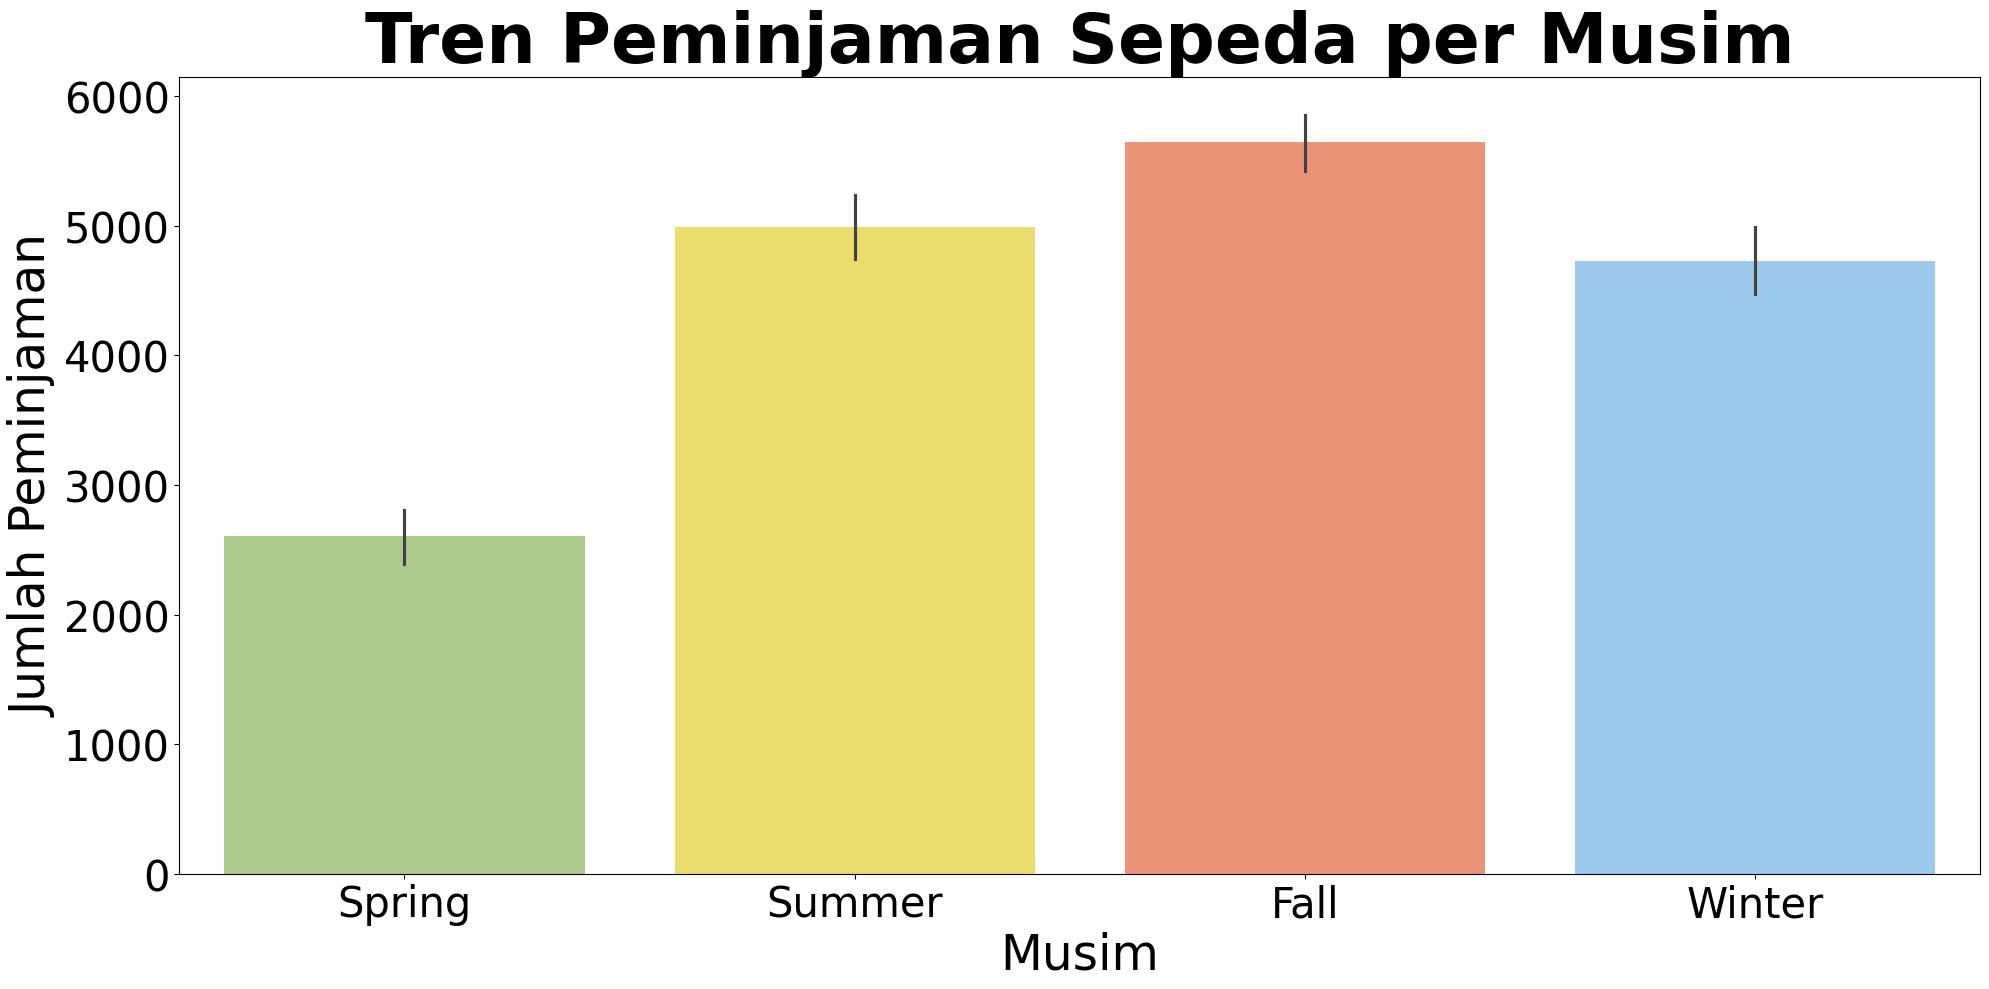

In [65]:
# Mapping warna per musim
season_colors = {
    "Spring": "#AED581",   # Hijau muda
    "Summer": "#FFEE58",   # Kuning
    "Fall": "#FF8A65",     # Oranye
    "Winter": "#90CAF9"    # Biru muda
}

# Urutan musim agar tampil sesuai logika
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Membuat subplot besar
fig, ax = plt.subplots(figsize=(20, 10))

# Plot bar 
sns.barplot(
    x="season",
    y="count_rent",
    hue="season",
    data=day_df,
    palette=season_colors,
    order=season_order,
    legend=False,
    ax=ax
)

# Mengatur judul dan label
ax.set_title("Tren Peminjaman Sepeda per Musim", loc="center", fontsize=50, fontweight='bold')
ax.set_xlabel("Musim", fontsize=35)
ax.set_ylabel("Jumlah Peminjaman", fontsize=35)

# Mengatur ukuran label sumbu
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)


# Menampilkan plot
plt.tight_layout()
plt.show()


### 2. Pada cuaca apa penyewaan sepeda paling banyak dan sedikit

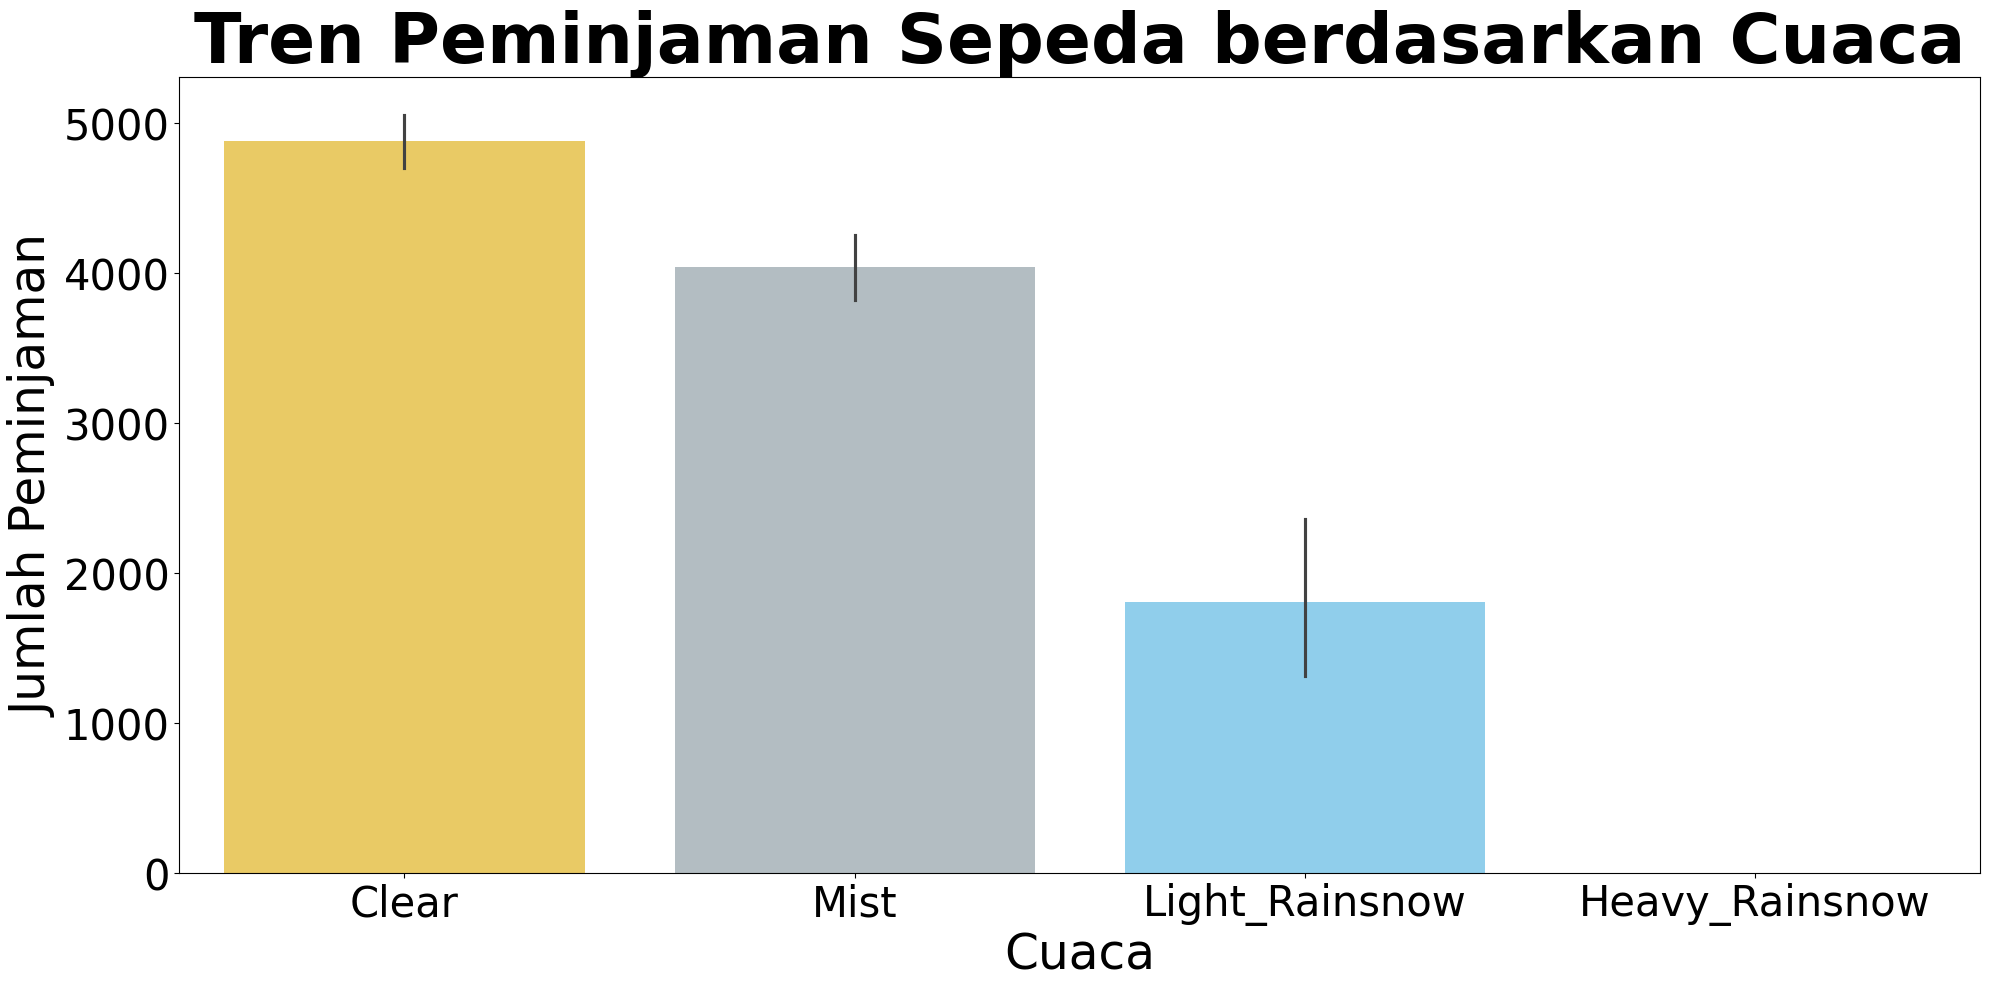

In [66]:
# Mapping warna per cuaca
weather_colors = {
    "Clear": "#FFD54F",
    "Mist": "#B0BEC5",
    "Light_Rainsnow": "#81D4FA",
    "Heavy_Rainsnow": "#455A64"
}              

# urutan cuaca
weather_order = ["Clear", "Mist", "Light_Rainsnow", "Heavy_Rainsnow"]
    
# membuat subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot bar 
sns.barplot(
    x="weather_situation",
    y="count_rent",
    hue="weather_situation",
    data=day_df,
    palette=weather_colors,
    order=weather_order,
    legend=False,
    ax=ax
)

# Mengatur judul dan label
ax.set_title("Tren Peminjaman Sepeda berdasarkan Cuaca", loc="center", fontsize=50, fontweight='bold')
ax.set_xlabel("Cuaca", fontsize=35)
ax.set_ylabel("Jumlah Peminjaman", fontsize=35)

# Mengatur ukuran label sumbu
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)


# Menampilkan plot
plt.tight_layout()
plt.show()


### 3. Pada jam berapa peminjaman sepeda mencapai peak dan paling sedikit ?

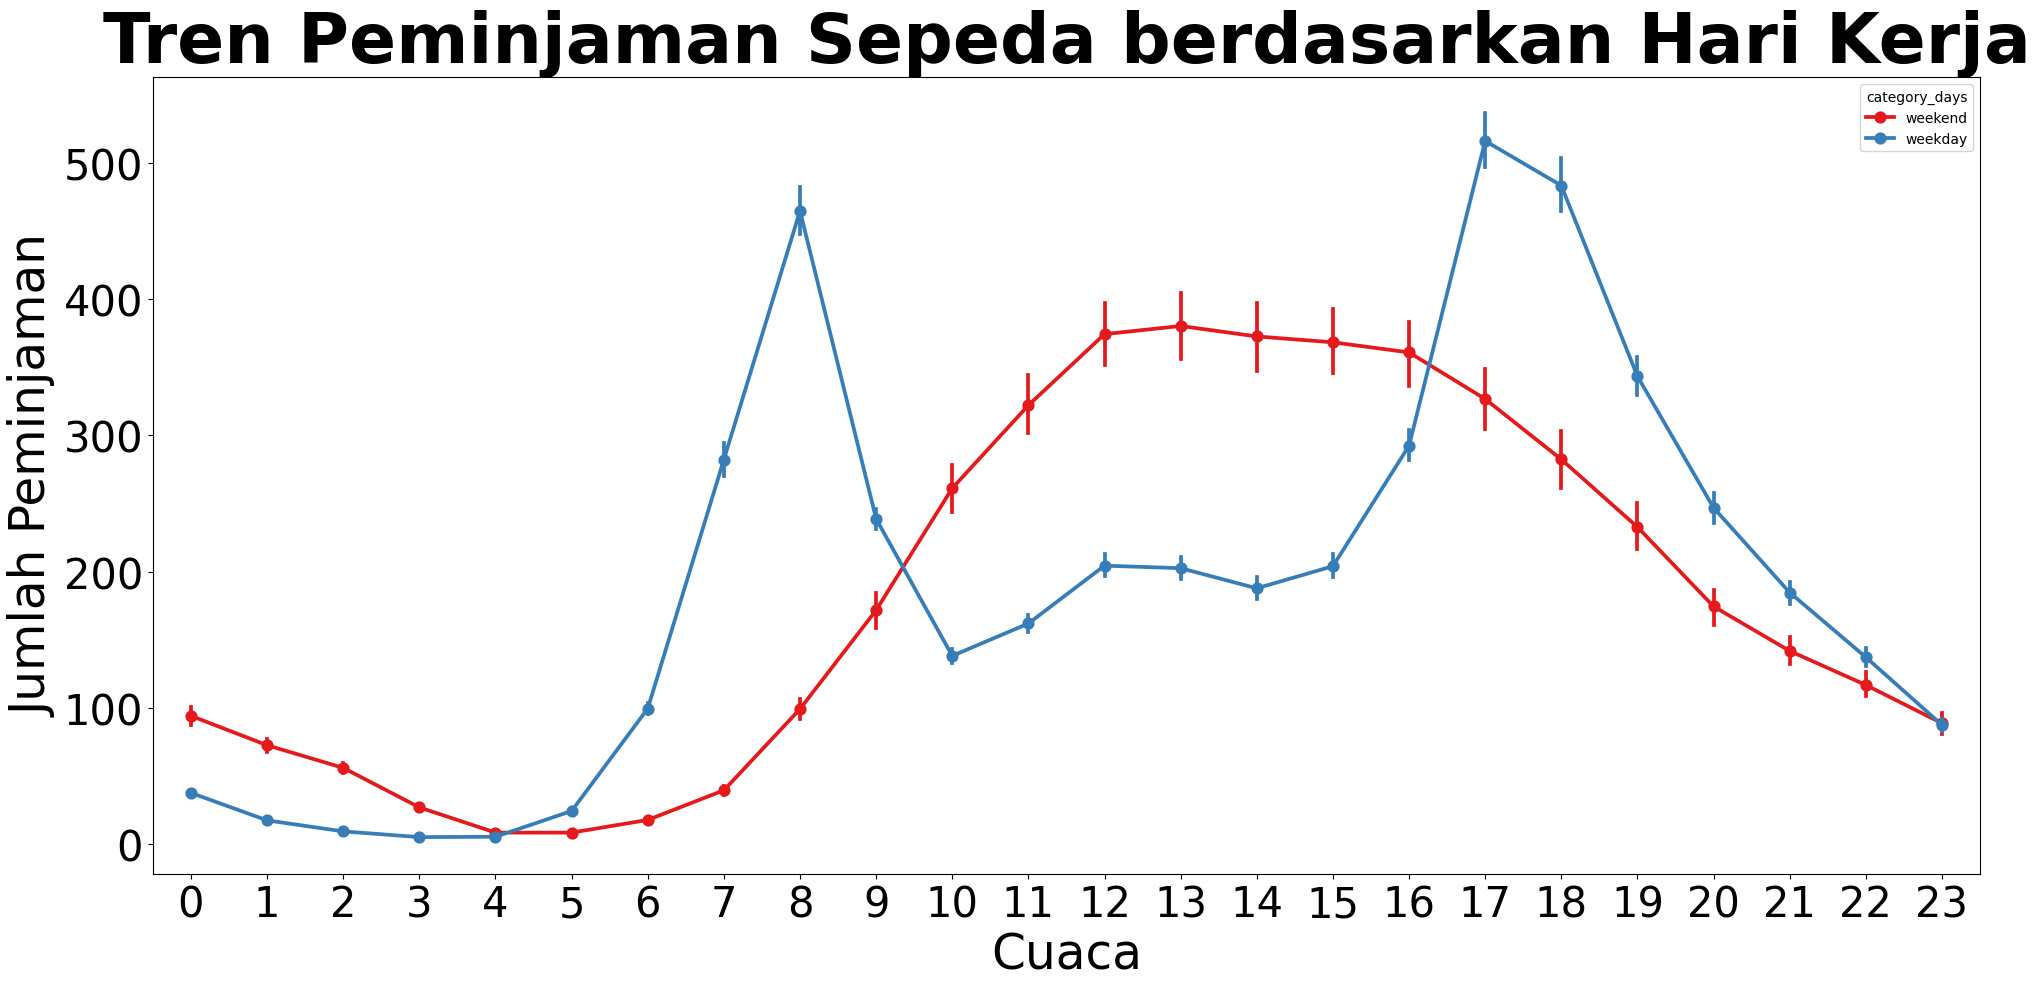

In [ ]:
# membuat subplot -> peminjaman berdaasarkan hari kerja data perjam
fig, ax = plt.subplots(figsize=(20, 10))

# Plot bar 
sns.pointplot(data=hour_df, x='hours', y='count_rent', hue='category_days', palette='Set1')


# Mengatur judul dan label
ax.set_title("Tren Peminjaman Sepeda berdasarkan Hari Kerja", loc="center", fontsize=50, fontweight='bold')
ax.set_xlabel("Cuaca", fontsize=35)
ax.set_ylabel("Jumlah Peminjaman", fontsize=35)

# Mengatur ukuran label sumbu
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)


# Menampilkan plot
plt.tight_layout()
plt.show()

### 4. Pada weekend atau weekday peminjaman sepeda lebih banyak ?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31036\286624239.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


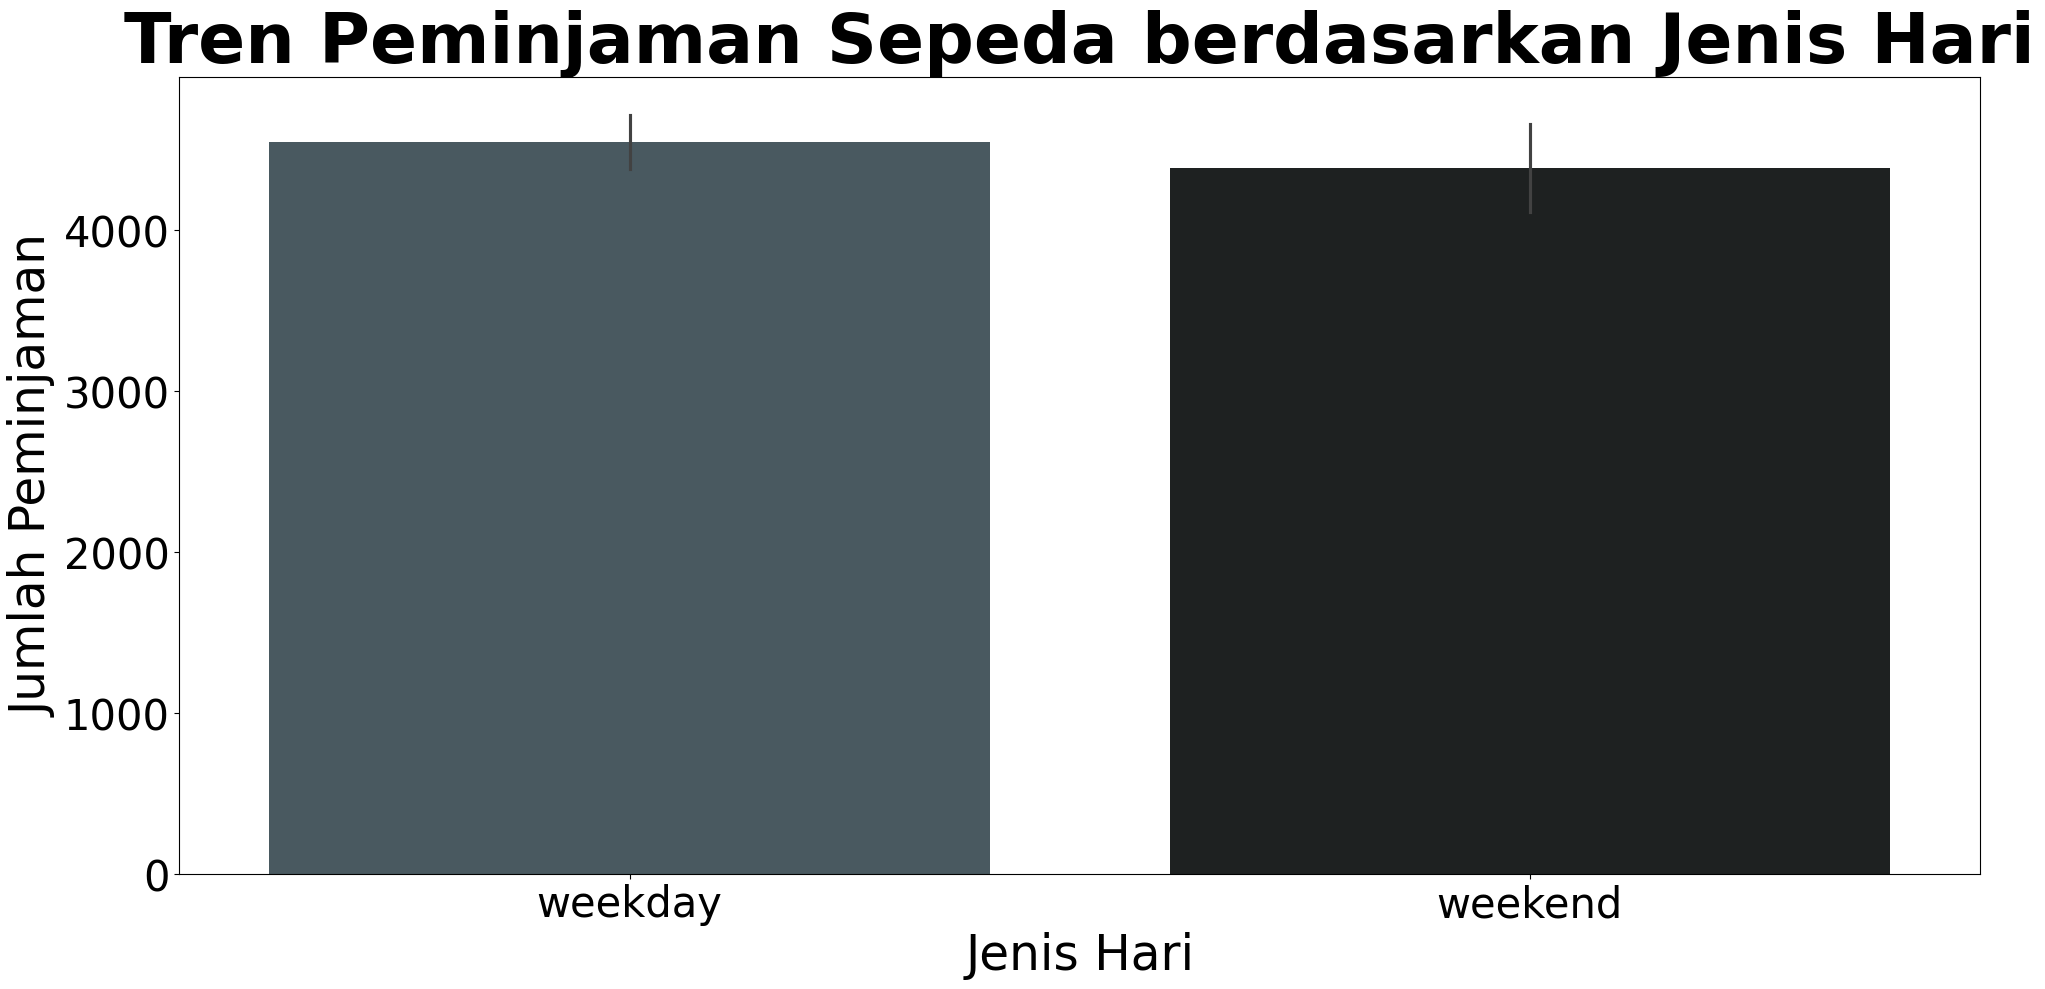

In [ ]:
# Mapping warna per jenis hari -> barplot peminjaman weekend dan weekday
day_colors = {
    "weekday": "#455A64",  
    "weekend": "#1D2122"   
}

# Urutan kategori hari
day_order = ["weekday", "weekend"]

# Membuat subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot bar
sns.barplot(
    x="category_days",
    y="count_rent",
    data=day_df,
    palette=day_colors,
    order=day_order,
    ax=ax
)

# Mengatur judul dan label
ax.set_title("Tren Peminjaman Sepeda berdasarkan Jenis Hari", loc="center", fontsize=50, fontweight='bold')
ax.set_xlabel("Jenis Hari", fontsize=35)
ax.set_ylabel("Jumlah Peminjaman", fontsize=35)

# Ukuran label sumbu
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.tight_layout()
plt.show()


### 5. Seberapa banyak seseorang melakukan rental berdasarkan registered dan casual 

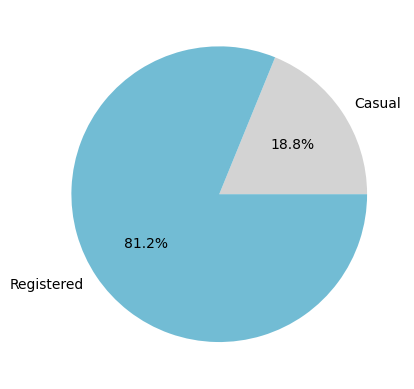

In [69]:
# sum berdasarkan jenis pelanggan
total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])

#pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

### 6. Bagaimana pengaruh humidity pada jumlah rental sepeda


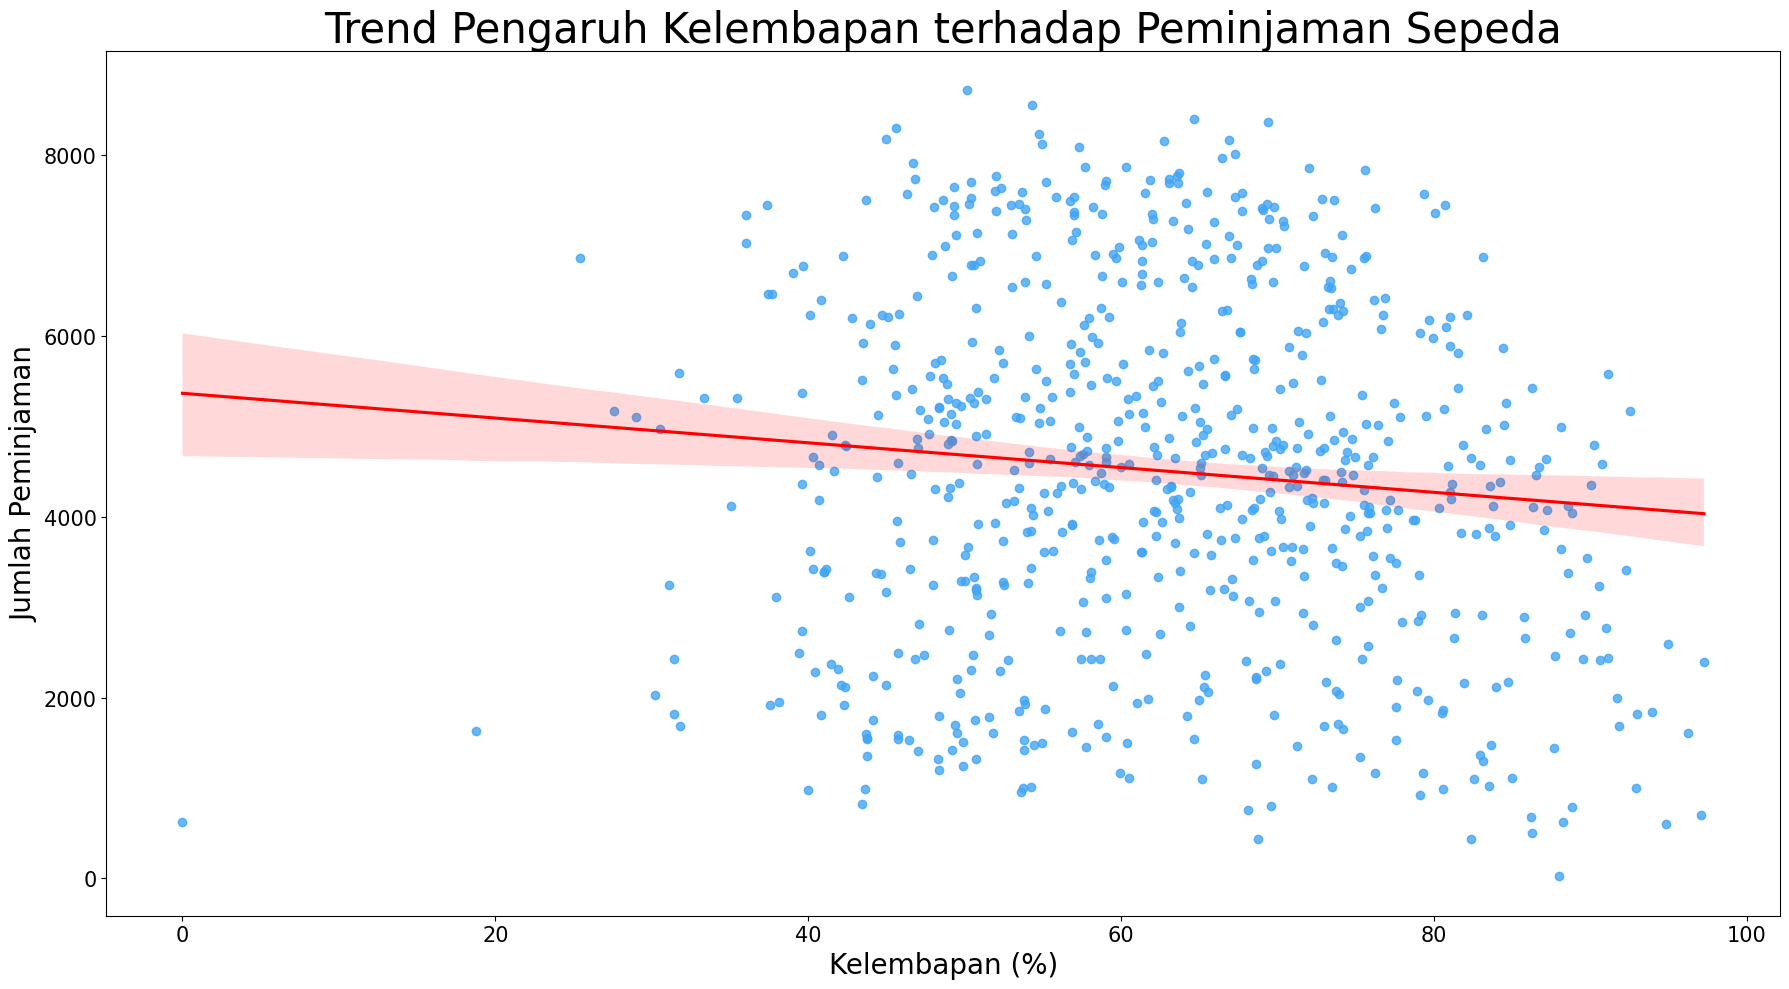

In [ ]:
# scatter plot regresi korelasi humidity dan count_rent
plt.figure(figsize=(18, 10))
sns.regplot(data=day_df, x="humidity", y="count_rent", scatter_kws={"color": "#42A5F5"}, line_kws={"color": "red"})

plt.title("Trend Pengaruh Kelembapan terhadap Peminjaman Sepeda", fontsize=30)
plt.xlabel("Kelembapan (%)", fontsize=20)
plt.ylabel("Jumlah Peminjaman", fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()
plt.show()

### 7. Bagaimana tren peminjaman dalam beebrapa tahun terkahir ?

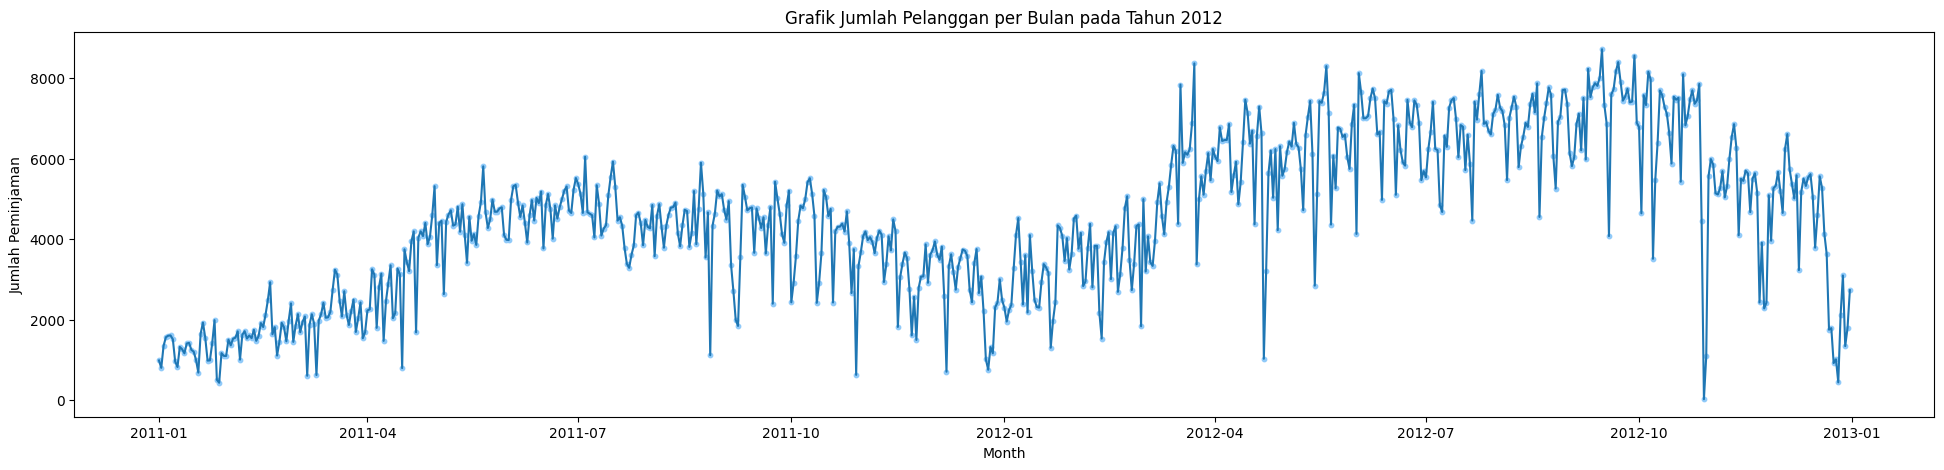

In [ ]:
# figure plot -> tren peminjaman beberapa tahun terakhir
plt.figure(figsize=(24, 5))

#  jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_rent'].groupby(day_df['dteday']).max()

# scatter plot 
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# line plot
plt.plot(monthly_counts.index, monthly_counts.values)

# label dan title
plt.xlabel('Month')
plt.ylabel('Jumlah Peminjaman')
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()

## Analisis Lanjutan (Opsional)

### RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

   registered  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0           0       38         24        35        2        3        1   
1           1        0        201       294        3        3        1   
2           2        1        245       648        3        3        1   
3           3        0        294      1154        3        3        1   
4           4        3        307      1602        3        3        1   
5           5        2        287      1840        3        3        1   
6           6        6        266      1992        3        3        1   
7           7        1        200      1787        3        3        1   
8           8        0        190      1968        3        3        1   
9           9        0        178      2057        3        3        1   

  RFM_Score Segment  
0       231  Others  
1       331   Loyal  
2       331   Loyal  
3       331   Loyal  
4       331   Loyal  
5       331   Loyal  
6       331   Loyal  
7       3

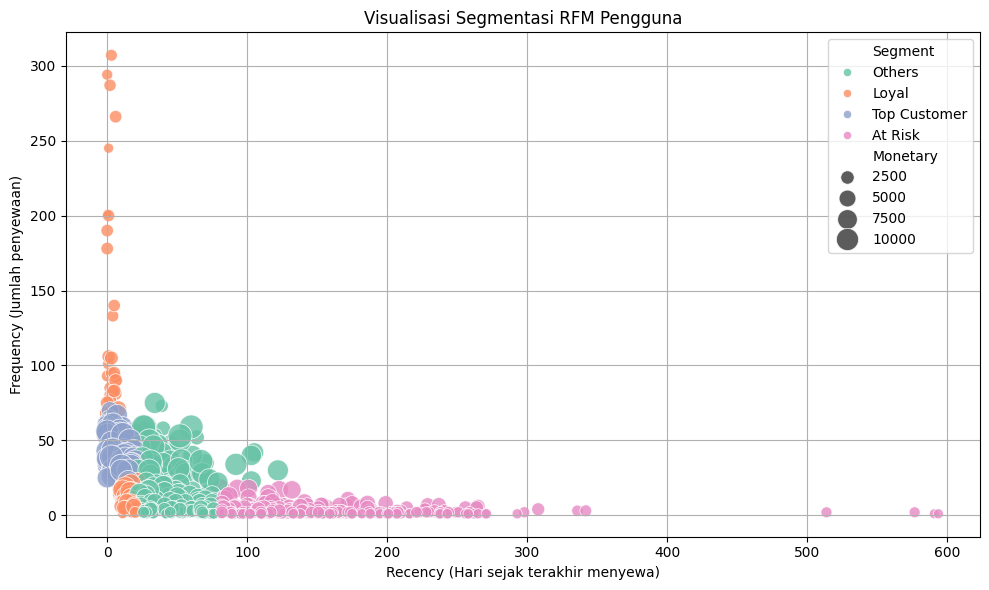

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
current_date = hour_df['dteday'].max()

# Hitung nilai dasar RFM
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',                                 # Frequency
    'count_rent': 'sum'                                 # Monetary
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Skoring RFM berdasarkan kuartil
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 3, labels=[3, 2, 1]).astype(int) 
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)

rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Segmentasi berdasarkan RFM_Score
def segment(row):
    if row['RFM_Score'] == '333':
        return 'Top Customer'
    elif row['R_Score'] == 3:
        return 'Loyal'
    elif row['R_Score'] == 1 and row['F_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df.apply(segment, axis=1)

print(rfm_df.head(10))

# Visualisasi RFM scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', size='Monetary',
                hue='Segment', palette='Set2', sizes=(40, 300), alpha=0.8)

plt.title('Visualisasi Segmentasi RFM Pengguna')
plt.xlabel('Recency (Hari sejak terakhir menyewa)')
plt.ylabel('Frequency (Jumlah penyewaan)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

### Menjawab Pertanyaan Bisnis


1. #### Musim apa dengan penyewaan sepeda terbanyak dan tersedikit?
- Temuan : Musim Gugur (Fall) menjadi musim dengan jumlah peminjaman sepeda terbanyak yaitu 1.061.129 pinjaman, sementara musim Semi (Spring) mencatat peminjaman terendah sebanyak 471.348 pinjaman.
- Alasan : Pada musim gugur, cuaca cenderung lebih sejuk dan stabil, membuat aktivitas luar ruangan seperti bersepeda lebih nyaman. Sedangkan musim semi sering kali masih memiliki curah hujan tinggi di beberapa wilayah.
- Rekomendasi : Tingkatkan promosi dan layanan pada musim gugur untuk memaksimalkan pendapatan. Di musim semi, pertimbangkan memberikan diskon atau menyediakan perlengkapan pelindung cuaca (misalnya jas hujan atau layanan antar sepeda).

2. ### Cuaca seperti apa yang paling banyak dan sedikit digunakan untuk penyewaan sepeda?
- Temuan: Penyewaan sepeda terbanyak terjadi saat cuaca cerah (2.257.952 transaksi) dan tidak ada penyewaan sama sekali pada cuaca ekstrem seperti salju lebat (heavy snow).
- Alasan: Kondisi cerah memberikan keamanan dan kenyamanan saat bersepeda, sedangkan kondisi ekstrem seperti salju membuat aktivitas luar ruangan menjadi tidak memungkinkan.
- Rekomendasi: Fokus pada perawatan dan kesiapan sepeda di musim/cuaca cerah, serta pertimbangkan pengembangan fitur di aplikasi untuk menunjukkan prediksi cuaca agar pengguna dapat merencanakan sewa secara optimal.

3. ### Jam berapa peminjaman sepeda paling banyak dan paling sedikit?
- Temuan: Jam sibuk pukul 17:00 (sore hari) menjadi puncak penyewaan sepeda, diikuti oleh pukul 08:00 (pagi hari). Peminjaman paling sedikit terjadi di jam 03:00 – 04:00 dini hari.
- Alasan: Puncak penyewaan bertepatan dengan jam berangkat dan pulang kerja/kuliah. Jam dini hari memiliki aktivitas minim karena waktu istirahat.
- Rekomendasi: Perbanyak armada dan lakukan maintenance di luar jam sibuk (misalnya tengah malam). Pertimbangkan pemberian insentif pada pengguna malam hari untuk meningkatkan penggunaan di jam sepi.

4. ### Weekend atau Weekday lebih banyak digunakan untuk peminjaman?
- Temuan: Penyewaan sepeda lebih banyak terjadi pada weekday dibandingkan weekend, dengan selisih signifikan.
- Alasan: Sepeda lebih sering digunakan sebagai moda transportasi saat hari kerja untuk ke kantor atau kampus.
- Rekomendasi: Fokus pada perbaikan dan kesiapan layanan di hari kerja. Untuk weekend, pertimbangkan paket wisata atau kegiatan komunitas agar penggunaan meningkat.

5. ### Perbandingan peminjaman antara kategori Registered dan Casual?
- Temuan: Pengguna Registered lebih banyak melakukan peminjaman dibandingkan pengguna Casual.
- Alasan: Registered users cenderung pengguna rutin (commuter) yang menggunakan sepeda secara konsisten.
- Rekomendasi: Tingkatkan strategi konversi dari casual ke registered dengan memberikan benefit eksklusif seperti point reward, harga lebih murah, atau layanan prioritas.

6. ### Bagaimana pengaruh kelembapan (humidity) terhadap jumlah peminjaman?
- Temuan: Peminjaman sepeda mencapai puncak pada kelembapan ideal (sekitar 50%–60%), dan menurun drastis ketika kelembapan <40% atau >80%.
- Alasan: Tingkat kelembapan yang ekstrem membuat pengguna merasa tidak nyaman dan risiko berkendara lebih tinggi (misal, licin atau pengap).
- Rekomendasi: Gunakan data ini untuk perencanaan operasional dan prediksi permintaan. Bisa juga menambahkan indikator kelembapan di aplikasi sebagai referensi pengguna sebelum menyewa.

7. ### Bagaimana tren peminjaman dalam beberapa tahun terakhir?
- Temuan: Terjadi peningkatan signifikan pada tahun 2021, terutama pada kuartal pertama dan akhir tahun, dengan puncak transaksi lebih tinggi dibandingkan tahun sebelumnya.
- Alasan: Kemungkinan besar karena pulihnya mobilitas pasca pandemi serta promosi atau kebijakan baru.
- Rekomendasi: Analisis lebih lanjut faktor-faktor pendorong peningkatan tersebut untuk digunakan sebagai strategi jangka panjang. Fokuskan promosi pada kuartal-kuartal dengan potensi lonjakan.